### import necessaries libraries

In [46]:
import pandas as pd
from seaborn import countplot,heatmap
import numpy as np 
import matplotlib.pyplot as plt

from re import sub 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB ,BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
nltk.download('stopwords')

import joblib



### Inspect Data

In [4]:
df = pd.read_csv('Tweets.csv') 
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


###  Data Prepration

In [5]:
df = df[df.sentiment != 'neutral']
df.reset_index(inplace = True ,drop = True )

In [6]:
df['sentiment'].replace(to_replace=['negative','positive'],value=[-1,1],inplace=True)
df.tail()

,textID,text,selected_text,sentiment
16358,b78ec00df5,enjoy ur night,enjoy,1
16359,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,-1
16360,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",-1
16361,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,1
16362,ed167662a5,But it was worth it ****.,But it was worth it ****.,1


In [7]:
df['sentiment'].value_counts()

 1    8582
-1    7781
Name: sentiment, dtype: int64

C:\Users\Mohamed Swalem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

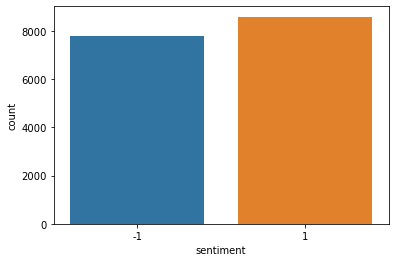

In [8]:
x =df['sentiment']
countplot(x)

In [9]:
df['text'][1]

'my boss is bullying me...'

In [10]:
df['sentiment'][1]

-1

In [11]:
df.drop(['textID','selected_text'],axis='columns',inplace=True)


In [12]:
len(df)

16363

In [13]:
sw = stopwords.words('english')

In [14]:
pw = PorterStemmer()

### Pre-processing Data(Data Cleaning)

In [15]:
corpus = []
for i in range (len(df)):
    statment = sub(pattern='[^a-zA-Z]',repl=' ',string=str(df['text'][i])) #remove punctuation
    statment = statment.lower()
    statment = statment.split()
    statment =[word for word in statment if word not in sw]
    statment = ' '.join(statment) #convert list to str 
    statment = pw.stem(statment) 
    corpus.append(statment)
#corpus    

In [16]:
cv = CountVectorizer()

In [17]:
x = cv.fit_transform(corpus).toarray()


In [18]:
y = df['sentiment']

### Splitting Data into train and test

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
x_train.shape

(11454, 18200)

In [21]:
y_train.shape

(11454,)

### Model Building

In [23]:
clf_model = MultinomialNB()

In [26]:
clf_model.fit(x_train,y_train)

MultinomialNB()

### Model Prediction

In [32]:
y_pred = clf_model.predict(x_test)
y_pred

array([ 1, -1,  1, ..., -1,  1,  1], dtype=int64)

In [39]:
y_test.values

array([ 1, -1,  1, ..., -1, -1, -1], dtype=int64)

### Model Evaluation

In [33]:
clf_model.score(x_test,y_test)

0.8455897331432064

In [34]:
clf_model.score(x_train,y_train)

0.9429893486991444

In [40]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[1946,  429],
       [ 329, 2205]], dtype=int64)

<AxesSubplot:>

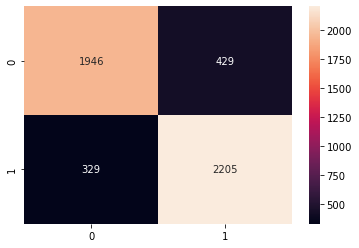

In [43]:
heatmap(cm, annot=True, fmt="d")

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.82      0.84      2375
           1       0.84      0.87      0.85      2534

    accuracy                           0.85      4909
   macro avg       0.85      0.84      0.85      4909
weighted avg       0.85      0.85      0.85      4909



### Model Deployment

In [47]:
joblib.dump(clf_model,'Sentiment.pkl')

['Sentiment.pkl']